In [93]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

In [94]:
import random
import numpy as np

import tic_tac_toe as ttt
import data_set as ds
import neural_network as nn

seed = 867342
data_set_file_name = "data_set.csv"
model_file_name = "model.h5"

random.seed(seed)
np.random.seed(int(seed))

data_set = ds.read_data_set(data_set_file_name)
training_set = data_set
x, y_true = nn.get_data_for_neural_network(training_set, nn.get_win_ratio)
model = nn.create_fit_model(x, y_true)
y_pred = model.predict(x)

Epoch 1/10
5478/5478 [==============================] - 0s 50us/step - loss: 0.1384 - mean_squared_error: 0.1384 - mean_absolute_error: 0.2807
Epoch 2/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0767 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2120
Epoch 3/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2108
Epoch 4/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2108
Epoch 5/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2109
Epoch 6/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0761 - mean_squared_error: 0.0761 - mean_absolute_error: 0.2111
Epoch 7/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2110
Epoch

In [95]:
error_function_list = [lambda y_t, y_p: list(map(lambda t, p: abs(t - p), y_t, y_p))]
errors = nn.compute_errors(model, x, y_true, y_pred, error_function_list)

opacity = 0.5
color = 'orange'

<IPython.core.display.Javascript object>


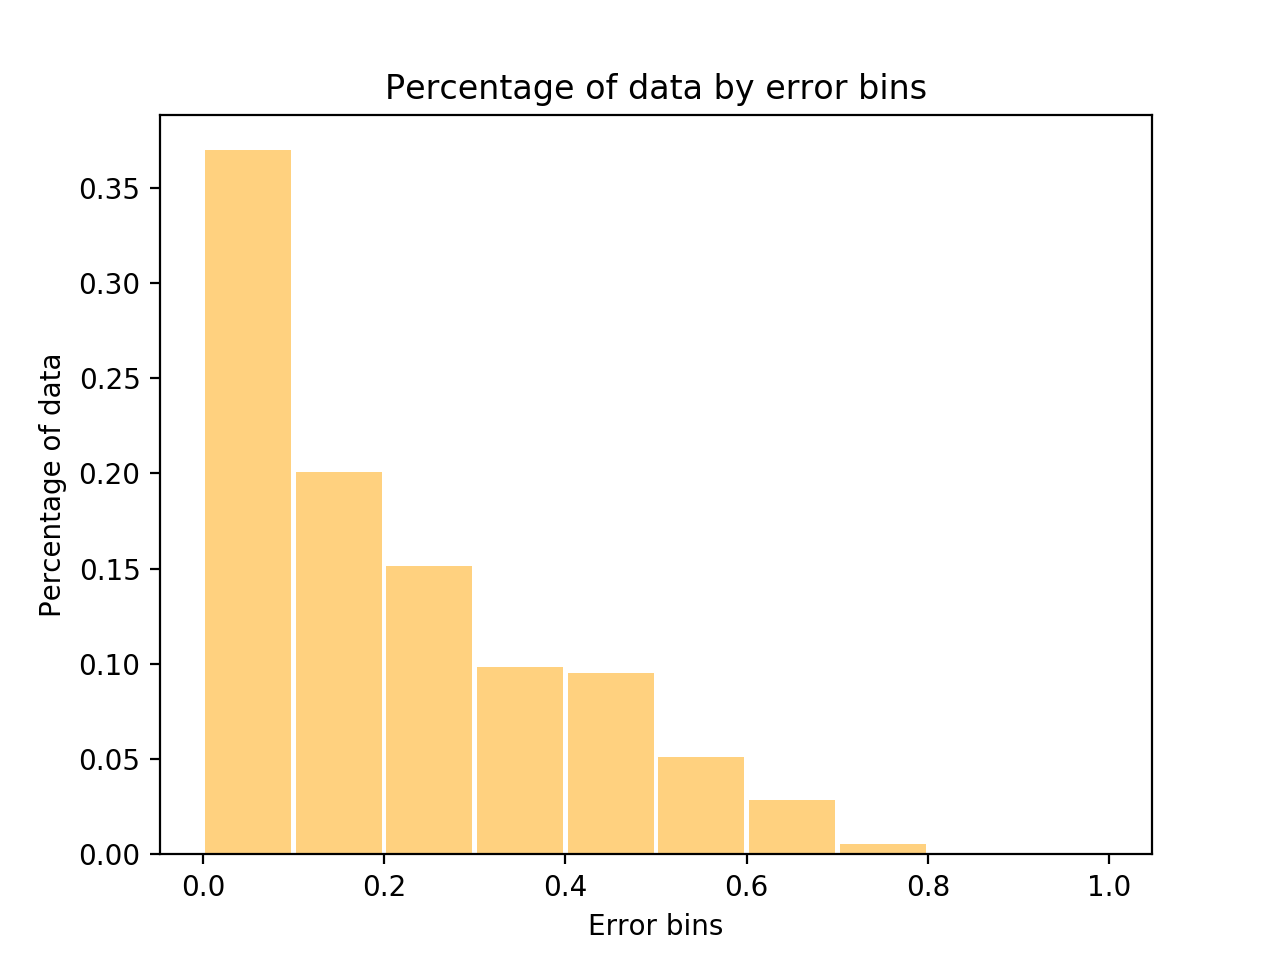

'\nAlternative 1:\ndf = pd.DataFrame({\'Errors\' : errors})\n\nfig = plt.figure()\nplt.hist(df.values, bins=bins, edgecolor="k")\nplt.show()\n\nAlternative 2:\ncenter = (bins[1:] + bins[:-1]) / 2\nfig = plt.figure()\nplt.hist(center, bins=len(data_percentages), weights=data_percentages, range=(min(bins), max(bins)))\nplt.show()\n'

In [96]:
# Error bins.
data_percentages, bins = nn.error_bins_data_percentage(errors[0][0], 10, (0.0, 1.0))

width = 0.95 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
fig = plt.figure()
plt.bar(center, data_percentages, align='center', width=width, alpha = opacity, color = color)
plt.title('Percentage of data by error bins')
plt.xlabel('Error bins')
plt.ylabel('Percentage of data')
plt.show()

"""
Alternative 1:
df = pd.DataFrame({'Errors' : errors})

fig = plt.figure()
plt.hist(df.values, bins=bins, edgecolor="k")
plt.show()

Alternative 2:
center = (bins[1:] + bins[:-1]) / 2
fig = plt.figure()
plt.hist(center, bins=len(data_percentages), weights=data_percentages, range=(min(bins), max(bins)))
plt.show()
"""

<IPython.core.display.Javascript object>


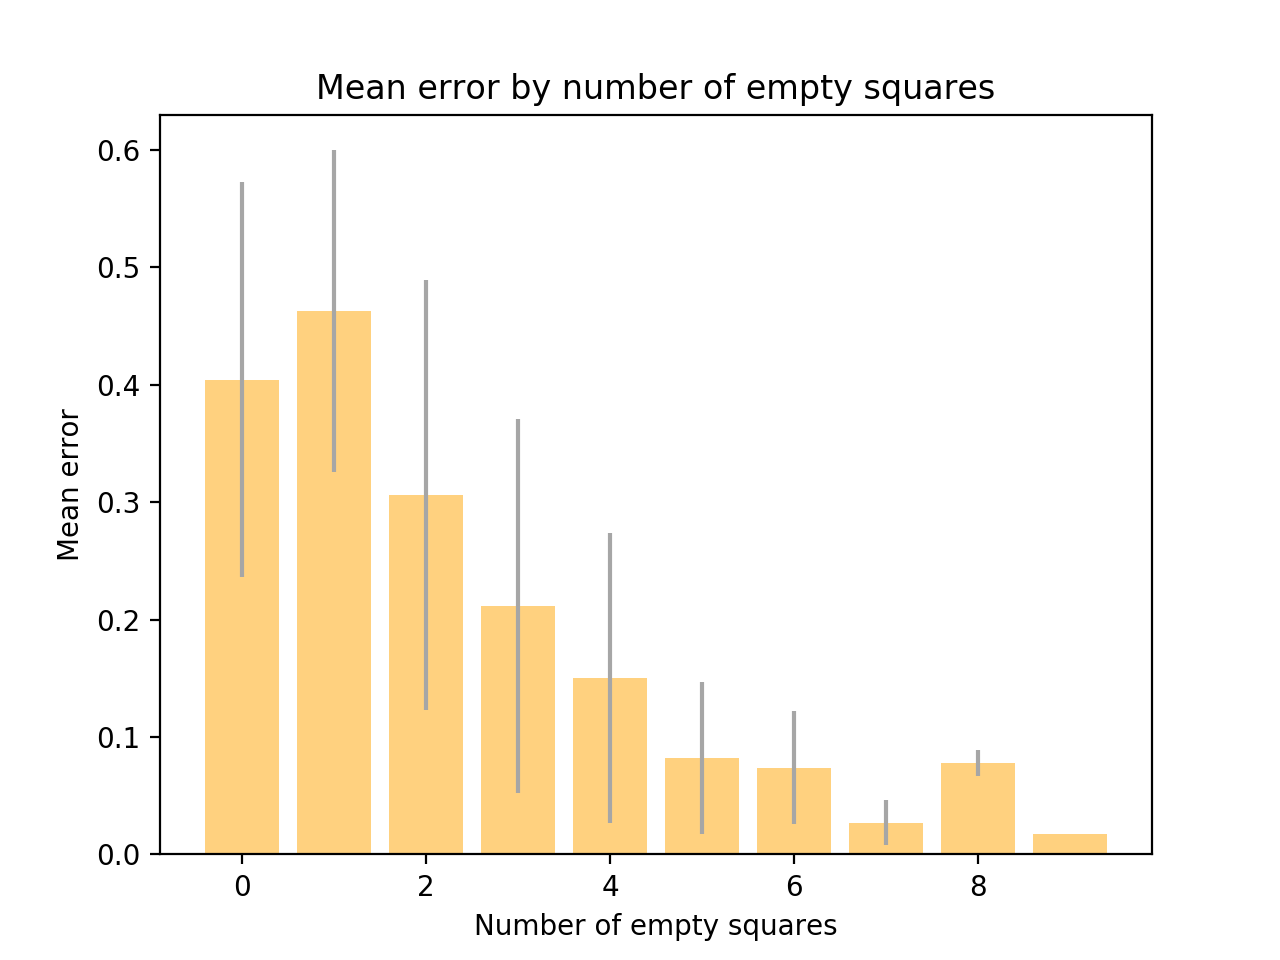

In [97]:
# Mean error.
mean_std = nn.mean_standard_deviation_error_by_num_empty_squares(x, errors[0][0])
mean = [mean for (mean, std) in  mean_std]
std = [std for (mean, std) in  mean_std]

num_empty_squares = np.array(range(ttt.SIZE + 1))

fig = plt.figure()
plt.bar(num_empty_squares, mean, alpha = opacity, color = color, yerr = std,  error_kw = {'ecolor': '0.65'})
plt.title('Mean error by number of empty squares')
plt.xlabel('Number of empty squares')
plt.ylabel('Mean error')
plt.show()